<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_9_AIDL_Pytorch_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with the dataset

We will look at convolutional/image examples as they allow us to get a good intuition on axises and are more complex to work on just 1D data

### A common nn pipeline looks like this:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model

In [ ]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [ ]:
# let's extend the Dataset class of Pytorch to build our own sample dataset
from torch.utils.data import Dataset
class OHLC(Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label = torch.tensor(r.is_up_day, dtype=torch.long)
    sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
    return sample, label

  def __len__(self):
    return len(self.data)

In [ ]:
# now let's work with FashionMnist

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


`torch.utils.data.DataLoader` is an iterator which provides all these features:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_set.train_labels.bincount() #frequency of each label, we have balanced class here

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
for e in train_set:
  print(e)
  break

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
      

In [ ]:
# so you can see we can iterate over our dataset

sample = next(iter(range(10)))
sample

0

In [ ]:
sample = next(iter(train_set))

len(sample)

2

In [ ]:
type(sample)

tuple

In [ ]:
image, label = sample

In [ ]:
# or
image = sample[0]
label = sample[1]


image.shape, label

(torch.Size([1, 28, 28]), 9)

label: 9


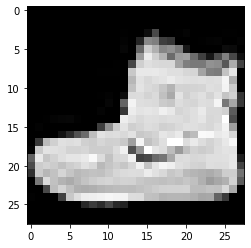

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [ ]:
batch = next(iter(train_loader))

len(batch), type(batch)

(2, list)

In [ ]:
images, labels = batch

In [ ]:
image.shape, labels.shape

(torch.Size([1, 28, 28]), torch.Size([10]))

labels: tensor([4, 0, 7, 8, 1, 7, 6, 3, 5, 2])


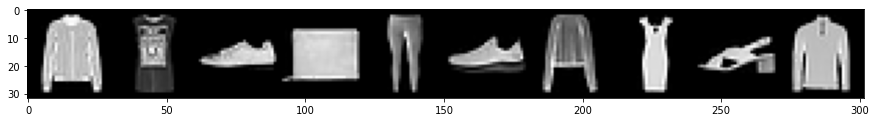

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

# Let's build a network

Below is the basic structure of a Model

In [ ]:
import torch.nn as nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

Let's make something usable

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # implement the forward pass
        return t

In [ ]:
network = Network()

print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
# accessing the network layers

network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [ ]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [ ]:
network.out

Linear(in_features=60, out_features=10, bias=True)

[link text](https://)### Accessing the Layer Weights

In [ ]:
network.conv1.weight

Parameter containing:
tensor([[[[-0.1101,  0.0884,  0.0630,  0.1012, -0.0329],
          [-0.1152, -0.1775, -0.0599,  0.0456, -0.1901],
          [ 0.0752, -0.0049, -0.1704,  0.1706, -0.0733],
          [-0.0889,  0.1509, -0.1346,  0.0269,  0.1308],
          [-0.1756,  0.1903, -0.0417,  0.1985,  0.0328]]],


        [[[-0.1535, -0.0898,  0.0305,  0.1851,  0.0779],
          [-0.1738, -0.1094, -0.1938, -0.0830, -0.1713],
          [ 0.0394, -0.0109, -0.0626,  0.1235, -0.0612],
          [-0.1656,  0.0233, -0.0984,  0.1046, -0.0107],
          [ 0.1512,  0.1431,  0.0910,  0.0427,  0.1661]]],


        [[[ 0.0492, -0.0683, -0.1744, -0.1581, -0.0835],
          [ 0.1614, -0.0378, -0.1463, -0.1989,  0.0790],
          [ 0.1398, -0.0612, -0.1788,  0.0740,  0.0787],
          [-0.0281, -0.1831,  0.0816, -0.1282,  0.1465],
          [-0.1684,  0.1588, -0.0325,  0.1356,  0.0748]]],


        [[[ 0.0774,  0.0345, -0.1580, -0.1282, -0.0316],
          [ 0.1850,  0.0149, -0.0018, -0.0536,  0.0901

In [ ]:
network.fc2.weight

Parameter containing:
tensor([[ 0.0451,  0.0590,  0.0219,  ..., -0.0896, -0.0363,  0.0620],
        [-0.0154,  0.0705,  0.0482,  ..., -0.0905,  0.0007,  0.0006],
        [ 0.0710, -0.0882,  0.0237,  ...,  0.0150,  0.0153, -0.0685],
        ...,
        [ 0.0718, -0.0581,  0.0817,  ..., -0.0633,  0.0494,  0.0210],
        [ 0.0081,  0.0693, -0.0575,  ...,  0.0499, -0.0830, -0.0796],
        [-0.0910,  0.0671,  0.0805,  ...,  0.0566, -0.0066, -0.0199]], requires_grad=True)

In [ ]:
network.fc1.weight.shape

torch.Size([120, 192])

In [ ]:
network.out.weight.shape

torch.Size([10, 60])

In [ ]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [ ]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


### Full Network

In [ ]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [ ]:
# We can turn the dynamic graphing/gradients feature OFF, since we aren't going to be training it for sometime. It also saves memory

In [ ]:
torch.set_grad_enabled(False)

In [ ]:
sample = next(iter(train_set))
image, label = sample
image.shape, image.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [ ]:
network = Network()
pred = network(image.unsqueeze(0)) # image shape needs to be (batch_size × in_channels × H × W)


In [ ]:
pred

tensor([[-0.0192,  0.0346, -0.0196, -0.1215,  0.1187,  0.0928, -0.0729, -0.0298,  0.0861,  0.1029]])

In [ ]:
pred.shape

torch.Size([1, 10])

In [ ]:
label

9

In [ ]:
pred.argmax(dim=1)

tensor([4])

In [ ]:
F.softmax(pred, dim=1)

tensor([[0.0961, 0.1014, 0.0961, 0.0868, 0.1103, 0.1075, 0.0911, 0.0951, 0.1068, 0.1086]])

In [ ]:
F.softmax(pred, dim=1).sum()

tensor(1.)

But that was 1 image only, lets now send a batch of images.

In [ ]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10
)

batch = next(iter(data_loader))
len(batch)

2

In [ ]:
batch[1]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
images, labels = batch

In [ ]:
images.shape

torch.Size([10, 1, 28, 28])

In [ ]:
preds = network(images)

preds.shape

torch.Size([10, 10])

In [ ]:
preds

tensor([[-0.0192,  0.0346, -0.0196, -0.1215,  0.1187,  0.0928, -0.0729, -0.0298,  0.0861,  0.1029],
        [-0.0188,  0.0303, -0.0168, -0.1274,  0.1198,  0.0938, -0.0754, -0.0293,  0.0899,  0.1013],
        [-0.0210,  0.0305, -0.0212, -0.1232,  0.1197,  0.0920, -0.0788, -0.0290,  0.0844,  0.1034],
        [-0.0214,  0.0306, -0.0203, -0.1246,  0.1181,  0.0922, -0.0774, -0.0285,  0.0868,  0.1020],
        [-0.0193,  0.0324, -0.0199, -0.1235,  0.1173,  0.0918, -0.0754, -0.0301,  0.0906,  0.0991],
        [-0.0207,  0.0313, -0.0169, -0.1245,  0.1185,  0.0943, -0.0737, -0.0288,  0.0882,  0.1025],
        [-0.0214,  0.0323, -0.0239, -0.1218,  0.1222,  0.0967, -0.0763, -0.0330,  0.0817,  0.1023],
        [-0.0220,  0.0321, -0.0165, -0.1226,  0.1166,  0.0941, -0.0741, -0.0274,  0.0880,  0.1024],
        [-0.0228,  0.0290, -0.0207, -0.1222,  0.1180,  0.0922, -0.0780, -0.0294,  0.0821,  0.1048],
        [-0.0183,  0.0305, -0.0199, -0.1238,  0.1187,  0.0940, -0.0736, -0.0308,  0.0818,  0.1041]])

In [ ]:
preds.argmax(dim=1)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False, False, False])

In [ ]:
preds.argmax(dim=1).eq(labels).sum()

tensor(0)

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

0

# Training

During the entire training process, we do as many epochs as necessary to reach our desired level of accuracy. With this, we have the following steps:

Get batch from the training set.
Pass batch to network.
Calculate the loss (difference between the predicted values and the true values).
Calculate the gradient of the loss function w.r.t the network's weights.
Update the weights using the gradients to reduce the loss.
Repeat steps 1-5 until one epoch is completed.
Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [ ]:
import torch.optim as optim

torch.set_grad_enabled(True) # remember we turned off the gradients?

### LOSS

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3180665969848633

### Calculating the gradients

In [ ]:
print(network.conv1.weight.grad) # currently there are no gradients

None


In [ ]:
loss.backward()

In [ ]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [ ]:
network.conv1.weight.grad

tensor([[[[ 1.2168e-03,  1.4914e-03,  7.3004e-04,  1.6943e-04,  1.5163e-04],
          [ 1.3834e-03,  8.1515e-04,  3.9130e-04,  2.2148e-04,  2.0439e-04],
          [ 1.0167e-03,  4.0052e-04,  3.4608e-04,  1.6580e-04,  1.4839e-04],
          [ 3.5635e-04,  9.9669e-05,  6.1826e-05, -9.2396e-06,  2.0170e-07],
          [-1.2477e-05, -4.2744e-05,  3.7077e-06, -8.9462e-06,  3.4067e-06]]],


        [[[-5.3627e-05, -2.8197e-05, -8.8688e-05,  4.6150e-05, -2.5755e-04],
          [-6.8399e-05, -6.3385e-05, -3.8176e-05,  4.9602e-05, -2.9483e-04],
          [-7.3686e-07,  4.0248e-06,  2.1817e-06,  2.5590e-05, -4.5422e-04],
          [ 2.7022e-06,  3.4884e-06, -3.2251e-06, -3.8254e-05, -3.7018e-04],
          [-3.2585e-06, -3.6560e-06, -8.9235e-08, -4.3995e-05, -7.5788e-04]]],


        [[[-1.2376e-03, -1.2430e-03, -1.0906e-03, -7.9120e-04, -6.6865e-04],
          [-1.4931e-03, -1.6601e-03, -7.9227e-04, -9.2083e-04, -7.6992e-04],
          [-1.7008e-03, -3.7490e-04, -3.2605e-04, -3.3641e-04, -3.69

### Updating the weights

In [ ]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

loss.item()

2.3180665969848633

In [ ]:
get_num_correct(preds, labels)

0

In [ ]:
optimizer.step()

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [ ]:
loss.item()

2.2656924724578857

In [ ]:
get_num_correct(preds, labels)

2

In [ ]:
optimizer.step()

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [ ]:
loss.item()

2.1993775367736816

In [ ]:
get_num_correct(preds, labels)

2

### Summary

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.2921648025512695
loss2: 2.2742462158203125


# Training with all batches

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0,
    "total_correct:", total_correct,
    "loss:", total_loss
)

epoch: 0 total_correct: 48058 loss: 324.41486743092537


### Training for multple epochs

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

epoch 0 total_correct: 51733 loss: 226.73406027257442
epoch 1 total_correct: 52519 loss: 202.6642245054245
epoch 2 total_correct: 52839 loss: 194.1630560606718
epoch 3 total_correct: 53032 loss: 188.4306263178587
epoch 4 total_correct: 53234 loss: 182.37898036837578
epoch 5 total_correct: 53272 loss: 179.6192414239049
epoch 6 total_correct: 53422 loss: 177.4588913396001
epoch 7 total_correct: 53428 loss: 178.94686291366816
epoch 8 total_correct: 53564 loss: 174.56039679795504
epoch 9 total_correct: 53587 loss: 173.31967356801033


## Complete Training Loop

In [ ]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=100
    ,shuffle=True
)

In [ ]:
for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

Please cover this whole [PyTorch Series](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG) (also the reference for our code) for even better understanding.